# Thanya Nguyen
### CS425 Lab 4 - Linear Regression
### Part 1

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
mpg_raw_df = pd.read_csv("auto-mpg.csv")
features = ["cylinders", "displacement", "horsepower", "weight", "acceleration"]
y = np.array(mpg_raw_df['mpg'])
#print(y)
mpg_df = mpg_raw_df[features]
print(mpg_df)

     cylinders  displacement  horsepower  weight  acceleration
0            8         307.0       130.0  3504.0          12.0
1            8         350.0       165.0  3693.0          11.5
2            8         318.0       150.0  3436.0          11.0
3            8         304.0       150.0  3433.0          12.0
4            8         302.0       140.0  3449.0          10.5
..         ...           ...         ...     ...           ...
387          4         140.0        86.0  2790.0          15.6
388          4          97.0        52.0  2130.0          24.6
389          4         135.0        84.0  2295.0          11.6
390          4         120.0        79.0  2625.0          18.6
391          4         119.0        82.0  2720.0          19.4

[392 rows x 5 columns]


Question 1.1 (60 points – 12 points for each feature): For each of the five features (cylinders,
displacement, horsepower, weight, and acceleration), do the following:
 - Create an X matrix where each row is the current feature of interest.
 - Do the train test split as indicated above. Create a plot that shows the current feature on the x-axis and the MPG on the y-axis for the training data.
 - In the report, note whether you expect linear regression will perform well using that feature to predict the MPG value and why you believe it will perform well or not perform well.
 - Use sklearn’s LinearRegression() to fit to the training data.
 - Create a prediction vector based on the training data, and calculate and print the mean-squared error and the R2 score using sklearn on the training set.
 - Create a prediction vector based on the testing data, and calculate and print the mean-squared error and the R2 score using sklearn on the testing set.
 - Print the coefficient and intercept parameters from the sklearn model for that feature.
 - Plot the line created from that linear regression along with points for the training data (as one color) and the testing data (as another color). Include a legend to denote which are training and which are testing. Note that the x-axis should be the feature you’re predicting on and the y-axis should be MPG.

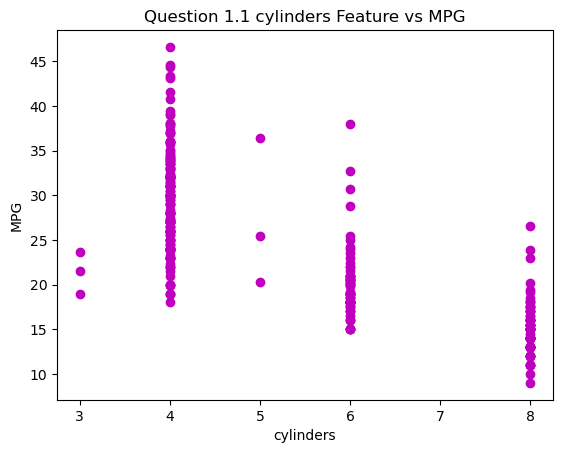

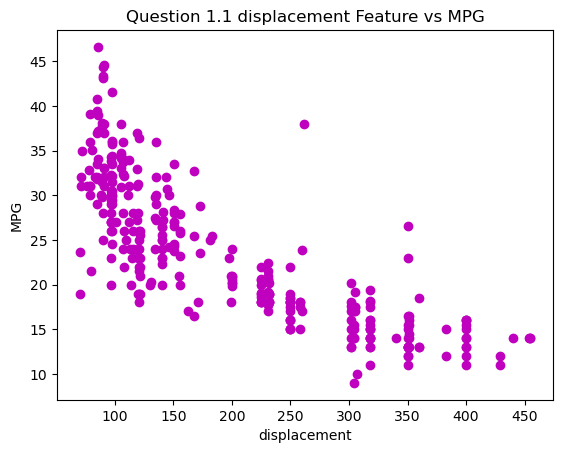

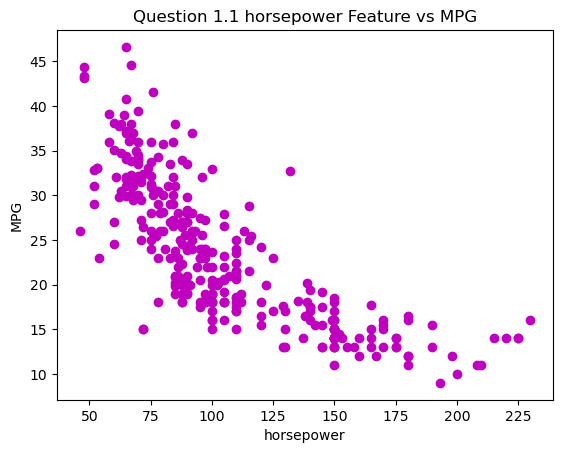

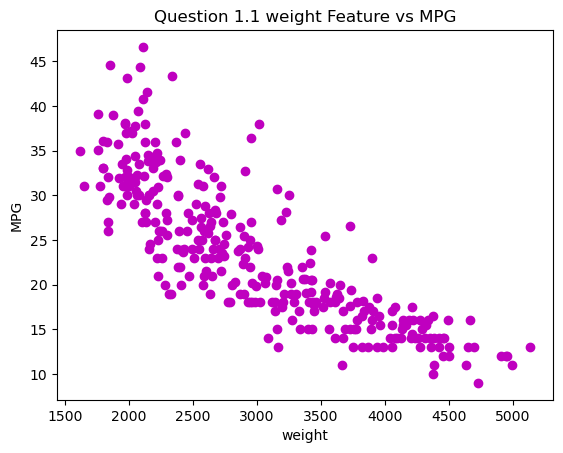

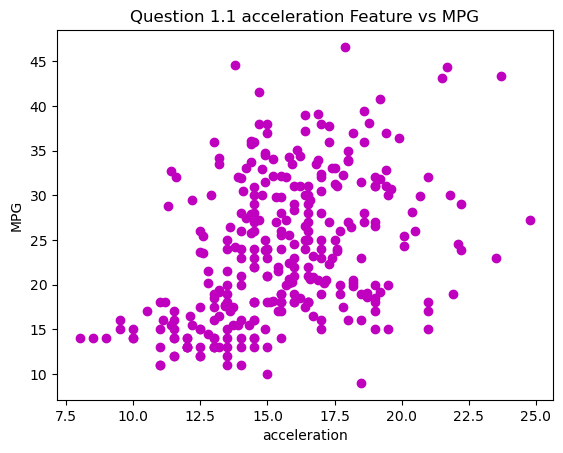

In [33]:

y = (mpg_raw_df['mpg'])
mpg_df = mpg_raw_df[features]
#print(mpg_df)
X_matrix = mpg_df.T  #the x matrix in question 
X = mpg_df
#print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for i in features:
   plt.scatter(X_train[i], y_train, c="m")
   plt.title("Question 1.1 " + i + " Feature vs MPG")
   plt.ylabel("MPG")
   plt.xlabel(i)
   plt.show()

Feature: cylinders
Coefficient:  -3.652154589303549
Intercept:  43.62203602314661


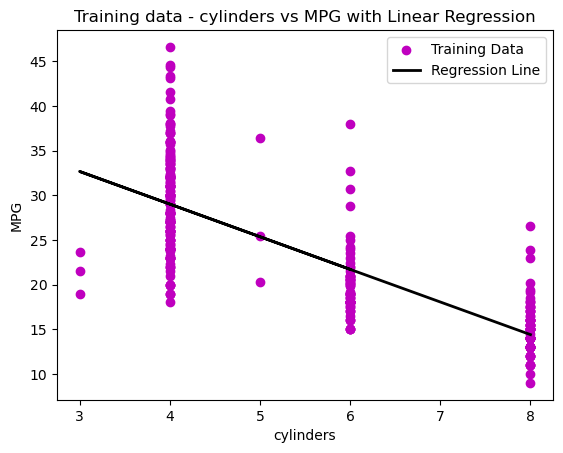

Mean squared error on train:  24.655233534565706
R2 on training:  0.6092657121665905


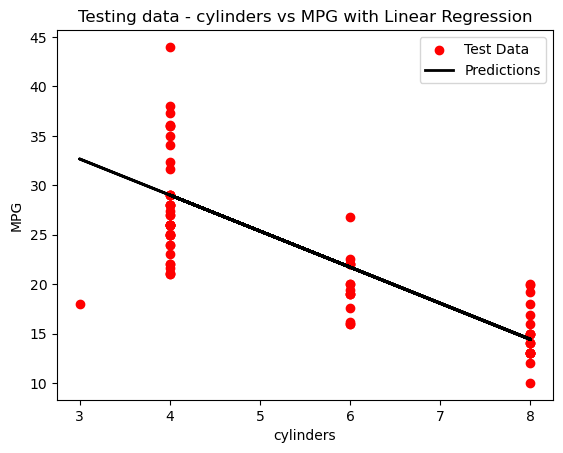

Mean squared error on test:  21.81398135353217
R2 on testing:  0.5726149669760378 

Feature: displacement
Coefficient:  -0.06222755649501378
Intercept:  35.765941772604975


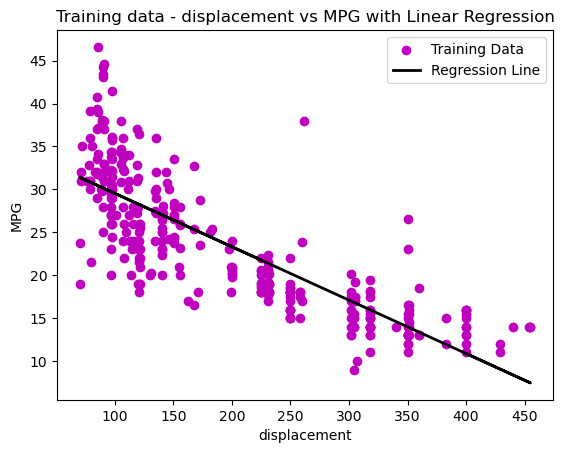

Mean squared error on train:  21.538297693471065
R2 on training:  0.6586626770902893


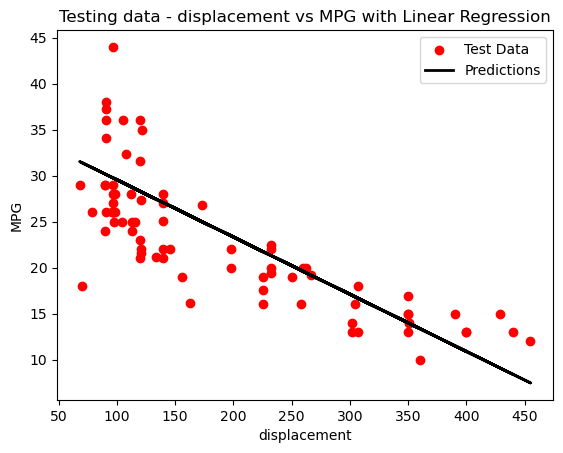

Mean squared error on test:  21.227484289611393
R2 on testing:  0.5841057656051312 

Feature: horsepower
Coefficient:  -0.16259724322918448
Intercept:  40.606097600118346


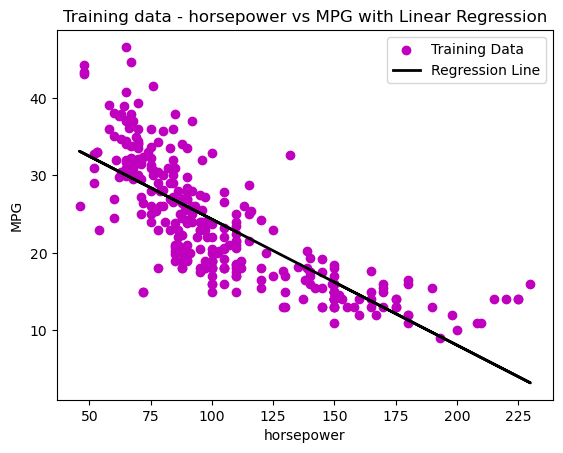

Mean squared error on train:  24.475168273683455
R2 on training:  0.6121193728863612


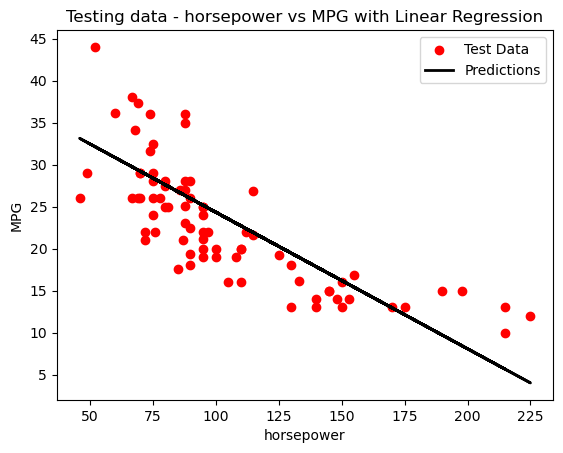

Mean squared error on test:  22.153237123863413
R2 on testing:  0.5659681822256184 

Feature: weight
Coefficient:  -0.007903610385225605
Intercept:  47.200526427552106


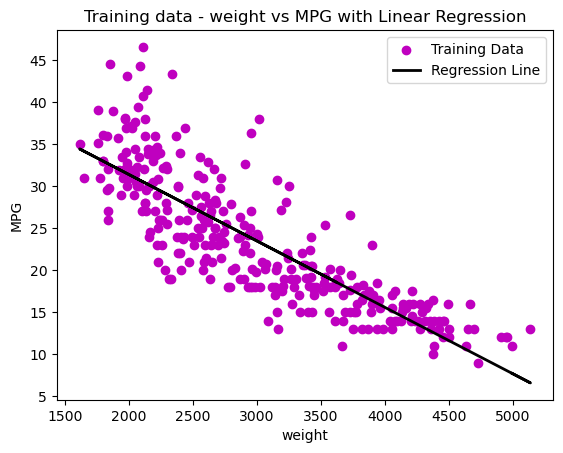

Mean squared error on train:  19.04510619658238
R2 on training:  0.6981745885310532


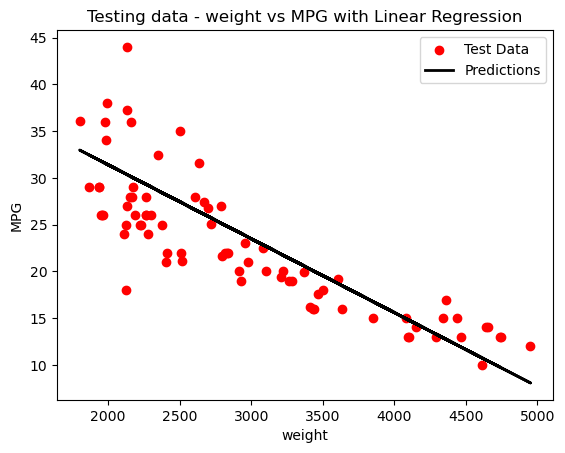

Mean squared error on test:  17.693388269545686
R2 on testing:  0.6533466675646016 

Feature: acceleration
Coefficient:  1.1634207761239546
Intercept:  5.515044402313496


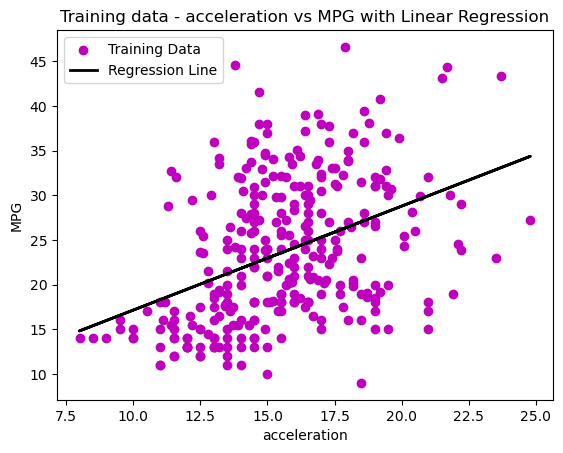

Mean squared error on train:  52.386427206105246
R2 on training:  0.16978383928843055


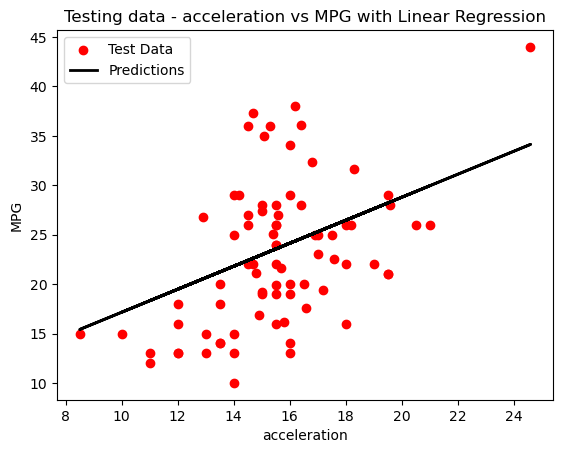

Mean squared error on test:  40.073906749162774
R2 on testing:  0.21486189605562878 



In [80]:
for i in features:
   regr = linear_model.LinearRegression()
   
   X_train_feature = X_train[i].values.reshape(-1, 1) 
   X_test_feature = X_test[i].values.reshape(-1, 1)
    
   regr.fit(X_train_feature, y_train)
   print("Feature: " + i)
   print("Coefficient: ", regr.coef_[0])
   print("Intercept: ", regr.intercept_)
   #the training plot/calculations
   y_pred_train = regr.predict(X_train_feature)
   plt.scatter(X_train_feature, y_train, color="m", label="Training Data")
   plt.plot(X_train_feature, y_pred_train, color="black", linewidth=2, label="Regression Line")
   plt.xlabel(i)
   plt.legend()
   plt.title("Training data - " + i + " vs MPG with Linear Regression")
   plt.ylabel('MPG')
   plt.show()
   print("Mean squared error on train: ", mean_squared_error(y_train, y_pred_train))
   print("R2 on training: ", r2_score(y_train, y_pred_train))

   #testing plot calculations
   y_pred_test = regr.predict(X_test_feature)
   plt.scatter(X_test_feature, y_test, color="red", label="Test Data")
   plt.plot(X_test_feature, y_pred_test, color="black", linewidth=2, label="Predictions")
   plt.title("Testing data - " + i + " vs MPG with Linear Regression")
   plt.xlabel(i)
   plt.legend()
   plt.title("Testing data - " + i + " vs MPG with Linear Regression")
   plt.ylabel('MPG')
   plt.show()
   print("Mean squared error on test: ", mean_squared_error(y_test, y_pred_test))
   print("R2 on testing: ", r2_score(y_test, y_pred_test), "\n")

   


Question 1.2 (10 points): Combining all of the data, do the following:
Create an X matrix that includes all five features.
- Do the train test split as indicated above.
- Use sklearn’s LinearRegression() to fit to the training data.
- Create a prediction vector based on the training data, and calculate and print the mean-squared error and the R2 score using sklearn.
- Create a prediction vector based on the testing data, and calculate and print the mean-squared error and the R2 score using sklearn.

Mean squared error on train:  17.87980377929501
R2 score on train:  0.7166422136497115


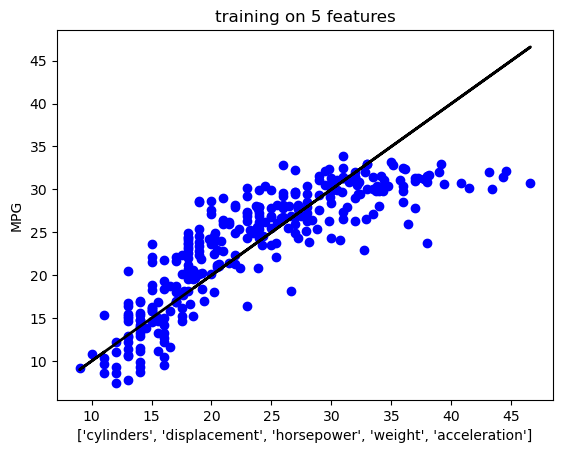

Mean squared error on test:  17.93917197663127
R2 score on test:  0.6485312110889081


Text(0.5, 1.0, 'testing on 5 features')

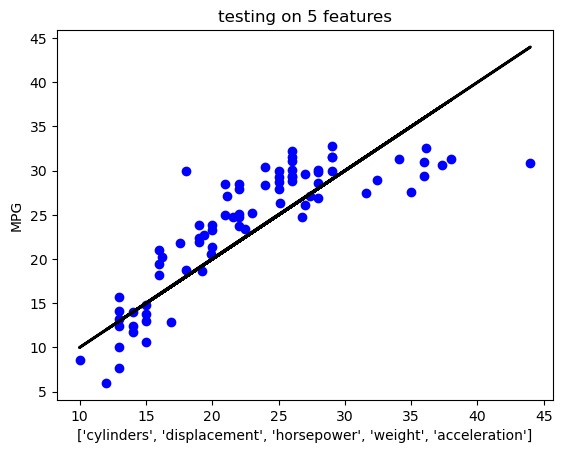

In [140]:
regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)
y_pred_train = regr.predict(X_train)
print("Mean squared error on train: ", mean_squared_error(y_train, y_pred_train))
print("R2 score on train: ", r2_score(y_train, y_pred_train))
plt.xlabel(features)
plt.ylabel("MPG")
plt.title("training on 5 features")
plt.scatter(y_train, y_pred_train, color="blue")
plt.plot(y_train, y_train, color="black", linewidth=2)
plt.show()

y_pred_test = regr.predict(X_test)
print("Mean squared error on test: ", mean_squared_error(y_test, y_pred_test))
print("R2 score on test: ", r2_score(y_test, y_pred_test))
plt.scatter(y_test, y_pred_test, color="blue")
plt.plot(y_test, y_test, color="black", linewidth=2)
plt.xlabel(features)
plt.ylabel("MPG")
plt.title("testing on 5 features")